# EDA Lab


# Supervised Learning: Sales Prediction via Linear Regression

## Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
advertising = pd.read_csv('./datasets/advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [6]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

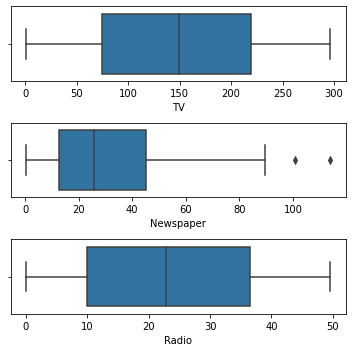

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()
plt.show()

### Inference: There are no considerable outliers present in the data.

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

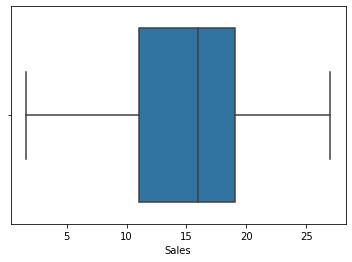

In [8]:
sns.boxplot(advertising['Sales'])
plt.show()

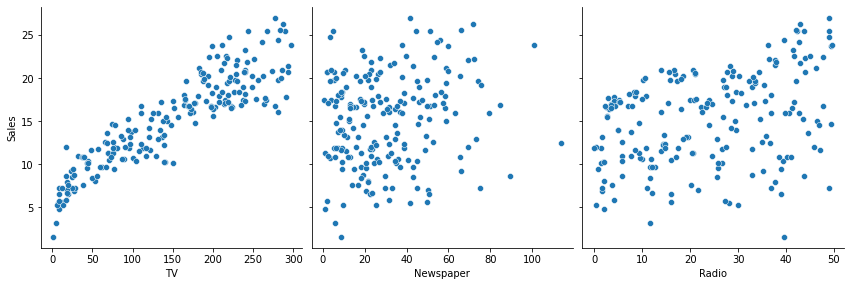

In [9]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

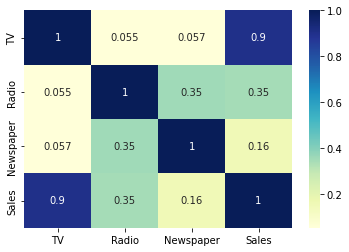

In [10]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

## Model Building

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building 

Assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [11]:
X = advertising['TV'].values
X=X.reshape(-1,1)
y = advertising['Sales'].values
y=y.reshape(-1,1)

#### Train-Test Split

- Split variables into training and testing sets. 
- Perform this by importing `train_test_split` from the `sklearn.model_selection` library. 
- It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [12]:
#X

In [13]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
# Let's now take a look at the train dataset
X_train.shape

(140, 1)

#### Building a Linear Model

- import the `linear_model` library for performing the linear regression.

In [16]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Linear Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    

In [17]:
lr =LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted

In [20]:
ic=lr.intercept_
ic

array([7.14382225])

In [21]:
coef=lr.coef_
coef

array([[0.05473199]])

In [22]:
#The coefficient for TV is 0.054
#y = ax + b
#Sales = A*TV + const

In [23]:
#lr.predict(X_test[0])
print(y_test)
lr.predict(X_test)

[[11.3]
 [ 8.4]
 [12. ]
 [25.4]
 [16.7]
 [ 8.7]
 [ 7.2]
 [18.2]
 [ 9.2]
 [16.6]
 [24.2]
 [10.6]
 [15.5]
 [20.6]
 [11.8]
 [13.2]
 [17.4]
 [ 1.6]
 [14.7]
 [17. ]
 [26.2]
 [10.3]
 [16.1]
 [12.9]
 [ 8.1]
 [15.2]
 [17.6]
 [22.6]
 [16.6]
 [ 8.5]
 [12.5]
 [23.7]
 [16.1]
 [21.8]
 [ 5.6]
 [ 6.7]
 [ 9.7]
 [17.9]
 [13.6]
 [ 7.2]
 [10.8]
 [11. ]
 [15. ]
 [20.9]
 [17.1]
 [14. ]
 [ 4.8]
 [ 8.7]
 [15.9]
 [10.4]
 [12.4]
 [19.7]
 [17.6]
 [20.5]
 [10.1]
 [ 9.7]
 [21.4]
 [16.4]
 [16.6]
 [ 5.5]]


array([[10.93127621],
       [ 9.88042193],
       [12.09159447],
       [22.99968079],
       [16.45920756],
       [10.21976029],
       [ 7.6199906 ],
       [20.28497391],
       [ 8.4464437 ],
       [17.95886418],
       [21.44529217],
       [11.91645209],
       [15.71485245],
       [17.42249065],
       [11.32534656],
       [13.72260788],
       [21.68063975],
       [ 7.18213465],
       [11.23230217],
       [18.82362968],
       [22.88474361],
       [14.82272095],
       [16.72739433],
       [14.35202581],
       [10.07198391],
       [13.88133066],
       [16.20744039],
       [18.36388094],
       [19.40378881],
       [ 8.51759529],
       [10.85465142],
       [18.03001578],
       [22.50709285],
       [20.3725451 ],
       [ 7.86628457],
       [ 8.16731053],
       [10.40584907],
       [17.03936669],
       [10.88749061],
       [ 8.51212209],
       [ 9.16343282],
       [ 8.86788005],
       [14.96502414],
       [18.61564811],
       [18.93309367],
       [12

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

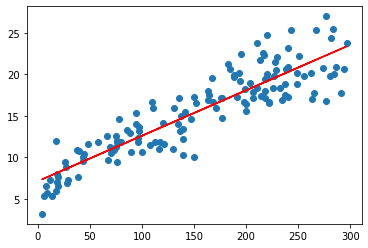

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, ic + coef*X_train, 'r')
plt.show()

## Model Evaluation

### Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [25]:
y_train_pred = lr.predict(X_train)
res = (y_train - y_train_pred)

In [26]:
res

array([[-3.95874695],
       [-1.25886418],
       [-1.90276285],
       [-0.60584491],
       [-0.51941275],
       [ 0.34102274],
       [-1.32191697],
       [ 1.9074968 ],
       [-1.93891441],
       [ 0.68012664],
       [ 3.43623213],
       [-0.49432899],
       [-1.3239689 ],
       [ 0.43361485],
       [-0.10904004],
       [ 3.54660485],
       [-1.32237341],
       [ 0.68537786],
       [ 0.61502609],
       [ 1.45459059],
       [-0.30310623],
       [-1.45328208],
       [ 0.10270202],
       [-1.63458441],
       [-2.56081137],
       [ 0.45881168],
       [ 3.91478746],
       [-0.2758533 ],
       [ 0.95503871],
       [-2.03138512],
       [-0.56787172],
       [ 1.83839297],
       [ 1.96279831],
       [-3.22614222],
       [ 1.70042395],
       [-5.48816488],
       [ 4.70088873],
       [-0.9707318 ],
       [ 1.32392056],
       [ 0.33976648],
       [-0.48418658],
       [ 0.62391223],
       [-1.67927457],
       [ 2.36234602],
       [-1.52203836],
       [-1

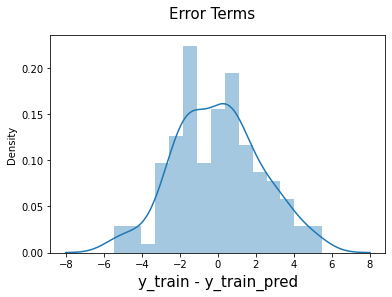

In [27]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

### Predictions on the Test Set

In [28]:
# 
X_test = np.array(X_test).reshape(-1,1)

# Predict the y values corresponding to X_test
y_pred = lr.predict(X_test)

In [29]:
y_pred

array([[10.93127621],
       [ 9.88042193],
       [12.09159447],
       [22.99968079],
       [16.45920756],
       [10.21976029],
       [ 7.6199906 ],
       [20.28497391],
       [ 8.4464437 ],
       [17.95886418],
       [21.44529217],
       [11.91645209],
       [15.71485245],
       [17.42249065],
       [11.32534656],
       [13.72260788],
       [21.68063975],
       [ 7.18213465],
       [11.23230217],
       [18.82362968],
       [22.88474361],
       [14.82272095],
       [16.72739433],
       [14.35202581],
       [10.07198391],
       [13.88133066],
       [16.20744039],
       [18.36388094],
       [19.40378881],
       [ 8.51759529],
       [10.85465142],
       [18.03001578],
       [22.50709285],
       [20.3725451 ],
       [ 7.86628457],
       [ 8.16731053],
       [10.40584907],
       [17.03936669],
       [10.88749061],
       [ 8.51212209],
       [ 9.16343282],
       [ 8.86788005],
       [14.96502414],
       [18.61564811],
       [18.93309367],
       [12

### $R^2$ - score in Linear Regression

- **R-squared**, which sometimes is also known as the **coefficient of determination**, defines the degree to which the variance in the dependent variable (target or response) can be explained by the independent variable (features or predictors).

- **`sklearn.metrics`** performance evaluation metrics

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<img src = './images/r2-score.png'></img>

##### Looking at the RMSE

In [31]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.3599871172248466

<img src = ./images/r2-formula.png width=500></img>

###### Checking the R-squared on the test set
 - $R^2$ ranges from [0,1]

In [32]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8150168765722069

## Different metrics for evaluating a linear regression model. 
<img src = './images/r2-score-eq.png'></img>

##### Visualizing the fit on the test set

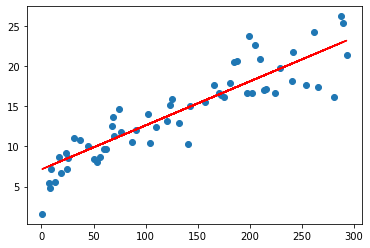

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, ic+ coef * X_test, 'r')
plt.show()